___
# Projeto 2
### Identificação de Distribuições

### Ana Capriles
___

O objetivo deste projeto é identificar quais distribuições (funções de densidade de probabilidade - no caso
contínuo, ou funções de probabilidade - no caso discreto) descrevem melhor variáveis quantitativas extraídas de um dataset
contendo a expectativa de vida de quase todos os país do mundo entre 1800 e 2013.
O resultado final esperado é identificar, com bons argumentos, a escolha de um ou mais
modelos probabilísticos para ajuste de uma variável quantitativa extraída do dataset.

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

In [6]:
df = pd.read_excel('Life.xlsx')

___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

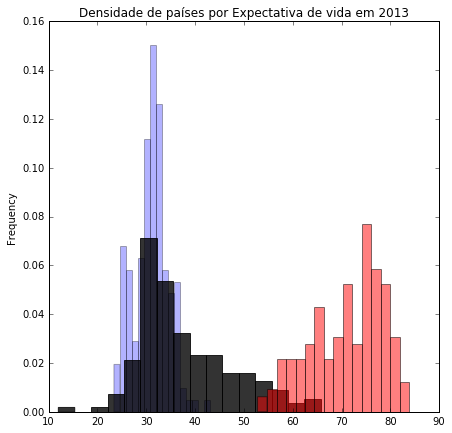

In [96]:
d = pd.DataFrame()

d['A1813'] = sorted(df.A1810)
d['A1913'] = sorted(df.A1941)
d['A2013'] = sorted(df.A2013)

d =  d.dropna()

d.A1813 = sorted(d.A1813)
d.A1913 = sorted(d.A1913)
d.A2013 = sorted(d.A2013)

plot = d.A1813.plot.hist(title='Densidade de países por Expectativa de vida em 1813', color = ('blue'), figsize=(7, 7), bins = 16, normed = 1, alpha = 0.3)
plot = d.A1913.plot.hist(title='Densidade de países por Expectativa de vida em 1913', color = ('black'),  figsize=(7, 7), bins=16, normed = 1, alpha = 0.8)
plot = d.A2013.plot.hist(title='Densidade de países por Expectativa de vida em 2013', color = ('red'),  figsize=(7, 7), bins=16, normed = 1, alpha = 0.5)
plt.show()

## Análise Descritiva

Verificando se os três anos escolhidos possuem diferentes distribuições por meio dos histogramas:

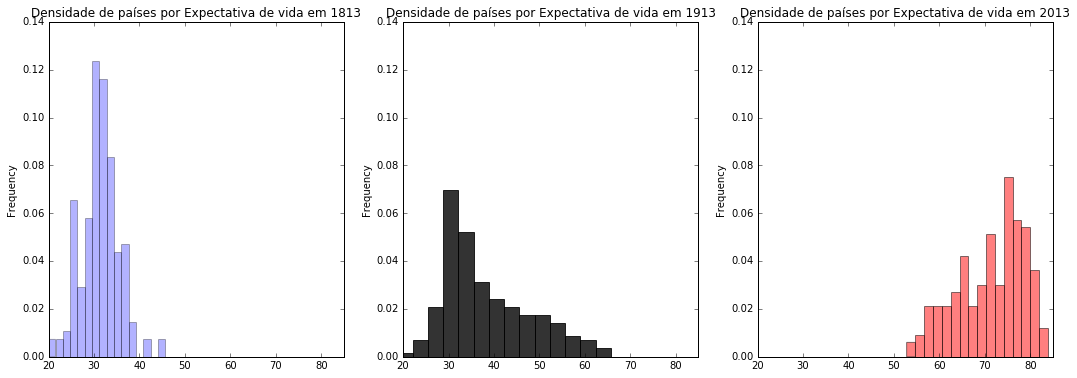

In [91]:
plt.subplot(1,3,1)
plot = d.A1813.plot.hist(title='Densidade de países por Expectativa de vida em 1813', color = ('blue'), figsize=(18, 6), bins = 16, normed = 1, alpha = 0.3)
plt.axis([20,85,0,0.14])
plt.subplot(1,3,2)
plot = d.A1913.plot.hist(title='Densidade de países por Expectativa de vida em 1913', color = ('black'),  figsize=(18, 6), bins=16, normed = 1, alpha = 0.8)
plt.axis([20,85,0,0.14])
plt.subplot(1,3,3)
plot = d.A2013.plot.hist(title='Densidade de países por Expectativa de vida em 2013', color = ('red'),  figsize=(18, 6), bins=16, normed = 1, alpha = 0.5)
plt.axis([20,85,0,0.14])
plt.show()

Sobrepondo os histogramas:

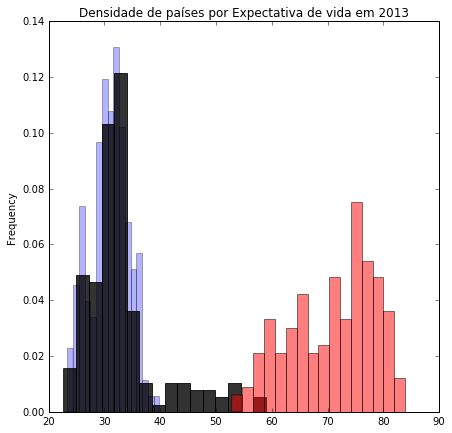

In [70]:
plot = d.A1813.plot.hist(title='Densidade de países por Expectativa de vida em 1813', color = ('blue'), figsize=(7, 7), bins = 16, normed = 1, alpha = 0.3)
plot = d.A1913.plot.hist(title='Densidade de países por Expectativa de vida em 1913', color = ('black'),  figsize=(7, 7), bins=16, normed = 1, alpha = 0.8)
plot = d.A2013.plot.hist(title='Densidade de países por Expectativa de vida em 2013', color = ('red'),  figsize=(7, 7), bins=16, normed = 1, alpha = 0.5)
plt.show()

In [72]:
print(d.A1813.describe())
print(d.A1913.describe())
print(d.A2013.describe())

count    171.000000
mean      30.871083
std        3.370476
min       23.387000
25%       28.799500
50%       31.100000
75%       33.050000
max       39.860000
Name: A1813, dtype: float64
count    171.000000
mean      33.023614
std        6.875451
min       22.690000
25%       29.477490
50%       31.813980
75%       33.850000
max       58.950000
Name: A1913, dtype: float64
count    171.000000
mean      70.876251
std        7.565019
min       52.800000
25%       64.800000
50%       72.300000
75%       76.500000
max       83.900000
Name: A2013, dtype: float64


### Aderência de um modelo probabilístico normal aos dados

___
### Aderência de um modelo probabilístico assimétrico aos dados

___
### Cálculo de probabilidades a partir da distribuição normal